### Instalação das Dependencias

In [ ]:
! pip install -r requirements.txt

### Importação de Dados

In [1]:
import pandas as pd
import mysql.connector
import numpy as np

In [2]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="admin",
    database="ag002")

mycursor = mydb.cursor()

# Select all records and headers from the "breast-cancer" table, and return the result:
mycursor.execute("SELECT * FROM ag002.`breast-cancer`")
headers = [column[0] for column in mycursor.description]
result = mycursor.fetchall()

# Create a Pandas DataFrame from the result:
df_ag = pd.DataFrame(result, columns=headers)

mycursor.close()
mydb.close()

In [3]:
df_ag.head()

,id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,1,3,3,7,1,1,3,1,2,1,1
1,2,4,3,5,1,1,2,2,3,1,1
2,3,4,3,5,1,1,2,1,2,1,1
3,4,6,2,4,1,1,2,2,1,1,1
4,5,4,3,1,1,1,2,2,4,1,1


In [5]:
recurrence = ['no','yes']

In [6]:
df_ag["recurrence"] = None

In [7]:
df_ag.iloc[df_ag.loc[df_ag["class"] == 1].index, 11] = recurrence[0]
df_ag.iloc[df_ag.loc[df_ag["class"] == 2].index, 11] = recurrence[1]

In [8]:
del(df_ag["class"])
del(df_ag["id"])

### Análise Exploratória

In [9]:
df_ag.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,3,3,7,1,1,3,1,2,1,no
1,4,3,5,1,1,2,2,3,1,no
2,4,3,5,1,1,2,1,2,1,no
3,6,2,4,1,1,2,2,1,1,no
4,4,3,1,1,1,2,2,4,1,no


In [10]:
df_ag.isna().any()

age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
recurrence     False
dtype: bool

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

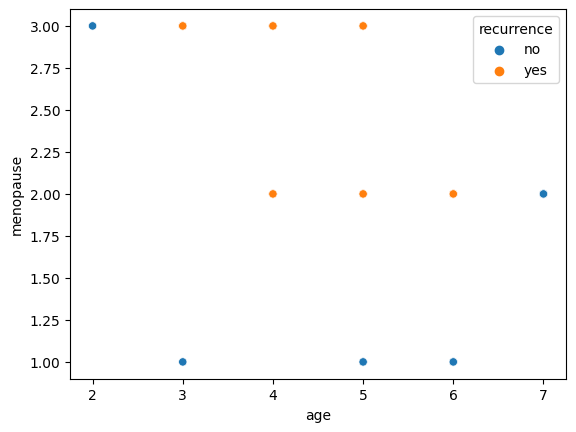

In [12]:
sns.scatterplot(data=df_ag, x="age", y="menopause", hue="recurrence")
plt.show()

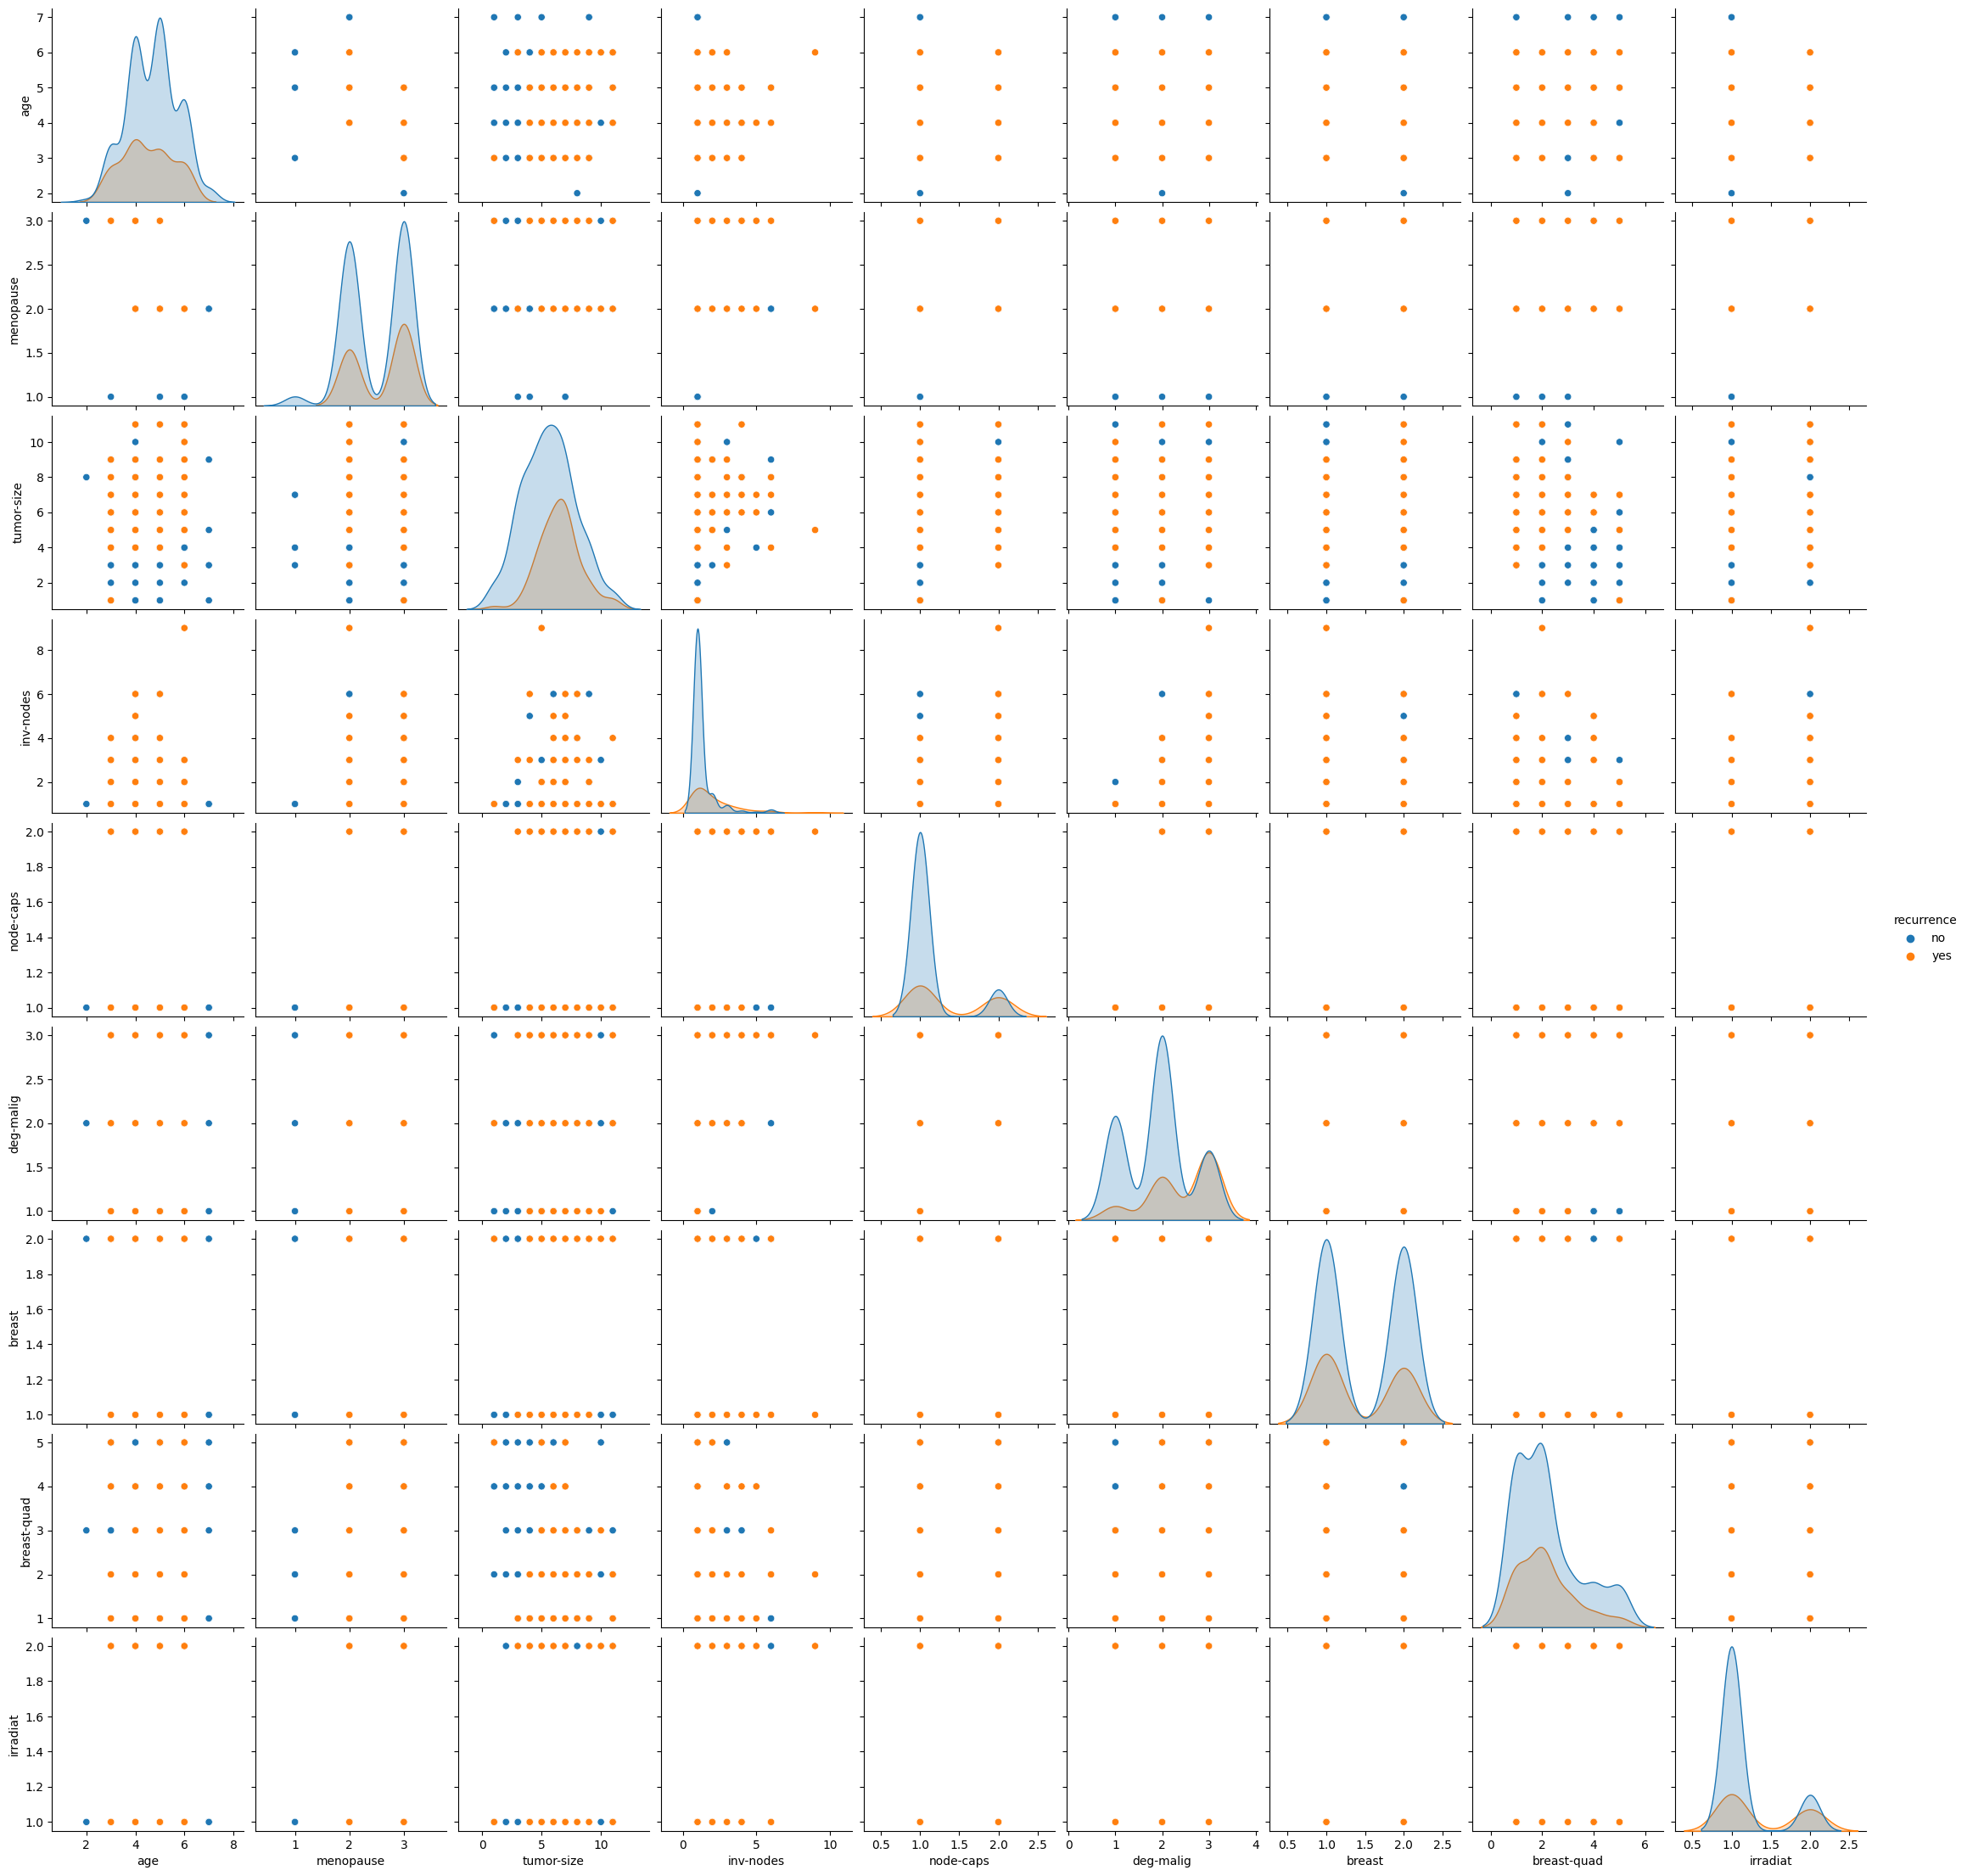

In [13]:
sns.pairplot(df_ag, hue="recurrence")

### Criação e Treinamento de Modelo

#### Divisão de dados

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data = df_ag.iloc[:, :9]
target = df_ag.iloc[:, -1]
print(target)

0       no
1       no
2       no
3       no
4       no
      ... 
272    yes
273    yes
274    yes
275    yes
276    yes
Name: recurrence, Length: 277, dtype: object


In [16]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data, target, test_size=0.2)

In [17]:
print("Treino: ", len(x_treino))
print("Teste: ", len(x_teste))

Treino:  221
Teste:  56


#### Criação do Modelo

In [19]:
#Primeiro modelo Decision Tree

from sklearn import tree
modelo1 = tree.DecisionTreeClassifier()
modelo1 = modelo1.fit(x_treino, y_treino)

In [20]:
# Segundo modelo Multilayer Perceptron

from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[200,80,100])
modelo = modelo.fit(x_treino, y_treino)

In [21]:

modelo1 = tree.DecisionTreeClassifier()
modelo1 = modelo.fit(x_treino, y_treino)

modelo = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=[200,80,100])
modelo = modelo.fit(x_treino, y_treino)

#### Predições

In [22]:
y_predicao1 = modelo1.predict(x_teste)
y_predicao = modelo.predict(x_teste)

In [23]:
y_predicao1

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no'], dtype='<U3')

In [24]:
y_predicao

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no'], dtype='<U3')

#### Avaliar o Modelo

In [25]:
from sklearn.metrics import classification_report

In [26]:
report1 = classification_report(y_teste, y_predicao1, target_names=recurrence)

In [27]:
print("Report para o modelo Decision Tree\n")
print(report1)

Report para o modelo Decision Tree

              precision    recall  f1-score   support

          no       0.80      1.00      0.89        39
         yes       1.00      0.41      0.58        17

    accuracy                           0.82        56
   macro avg       0.90      0.71      0.73        56
weighted avg       0.86      0.82      0.79        56



In [28]:
report = classification_report(y_teste, y_predicao, target_names=recurrence)

In [29]:
print("Report para o modelo Multilayer Perceptron\n")
print(report)

Report para o modelo Multilayer Perceptron

              precision    recall  f1-score   support

          no       0.80      1.00      0.89        39
         yes       1.00      0.41      0.58        17

    accuracy                           0.82        56
   macro avg       0.90      0.71      0.73        56
weighted avg       0.86      0.82      0.79        56



In [ ]:
entrada = input("Entre com os valores de (age menopause tumor-size inv-nodes node-caps deg-malig breast breast-quad irradiat)").split()
entrada = list(map(int,entrada))
entrada = np.array([entrada])
print(f"Predição Decision Tree {modelo1.predict(entrada)}")
print(f"Predição MLP {modelo.predict(entrada)}")